In [2]:
import librosa.display
import numpy as np

Load Audiodata

In [3]:
audioPath = "../soundFiles/TroglodytesTroglodytes/WAV/TroglodytesTroglodytes0.wav"
#audioPath = "soundFiles/Test/test1.m4a"
    
audioData, sr = librosa.load(audioPath)
     
print(sr)
print(len(audioData))

22050
479842


Get noise
- shorten noise to one second

22050


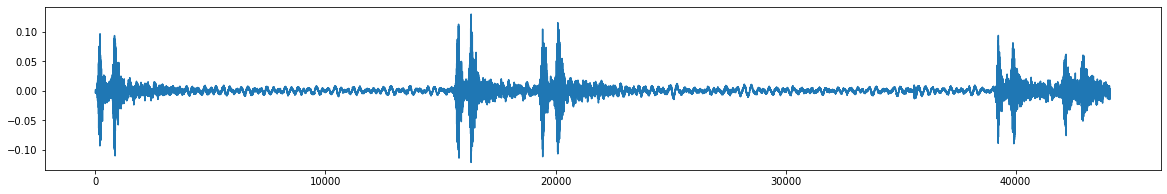

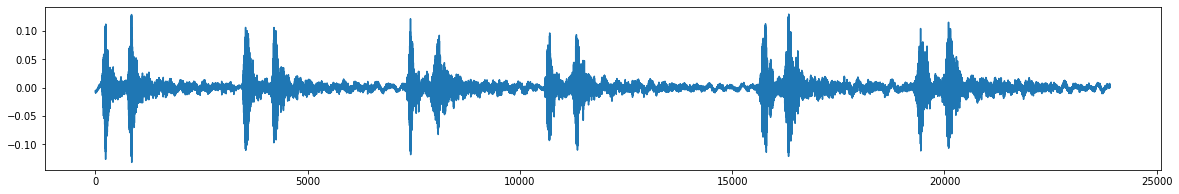

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))
plt.plot(audioData[44100:88200])

#plt.figure(figsize=(20, 3))
#plt.plot(audioData[11700:15000])

#plt.figure(figsize=(20, 3))
#plt.plot(audioData[18200:22000])

#plt.figure(figsize=(20, 3))
#plt.plot(audioData[38700:42000])

#plt.figure(figsize=(20, 3))
#plt.plot(audioData[44000:49000])

#plt.figure(figsize=(20, 3))
#plt.plot(audioData[59500:63000])

#plt.figure(figsize=(20, 3))
#plt.plot(audioData[63000:68000])

callArray = np.array([])
callArray = np.append(callArray, audioData[11700:15000])
callArray = np.append(callArray, audioData[18200:22000])
callArray = np.append(callArray, audioData[38700:42000])
callArray = np.append(callArray, audioData[44000:49000])
callArray = np.append(callArray, audioData[59500:63000])
callArray = np.append(callArray, audioData[63000:68000])

plt.figure(figsize=(20, 3))
plt.plot(callArray)

oneSecondCall = callArray[0:22050]

Fourier-transform one second of noise

In [25]:
callStft = librosa.stft(oneSecondCall)

print(callStft.shape)
print(callStft[0])

(1025, 44)
[-0.08274522+0.j -0.01897994+0.j  0.04100087+0.j  0.02263826+0.j
 -0.00868094+0.j -0.0186012 +0.j -0.03219088+0.j -0.04510127+0.j
 -0.04882882+0.j -0.03177172+0.j  0.00851434+0.j  0.0075104 +0.j
  0.00964709+0.j  0.01774321+0.j -0.00189817+0.j -0.00144211+0.j
 -0.0036527 +0.j  0.00201158+0.j  0.02233637+0.j  0.06204921+0.j
  0.14584566+0.j  0.08706216+0.j -0.01975592+0.j -0.03123474+0.j
 -0.01029422+0.j  0.00904822+0.j -0.00334681+0.j  0.00171807+0.j
  0.00264462+0.j  0.05628034+0.j  0.09608293+0.j  0.0015216 +0.j
 -0.05027787+0.j -0.00522135+0.j  0.02808588+0.j  0.0309995 +0.j
  0.01357574+0.j -0.00925662+0.j -0.00931031+0.j -0.03225545+0.j
 -0.03528991+0.j  0.00035541+0.j  0.1396836 +0.j  0.30932997+0.j]


Visualize the noise

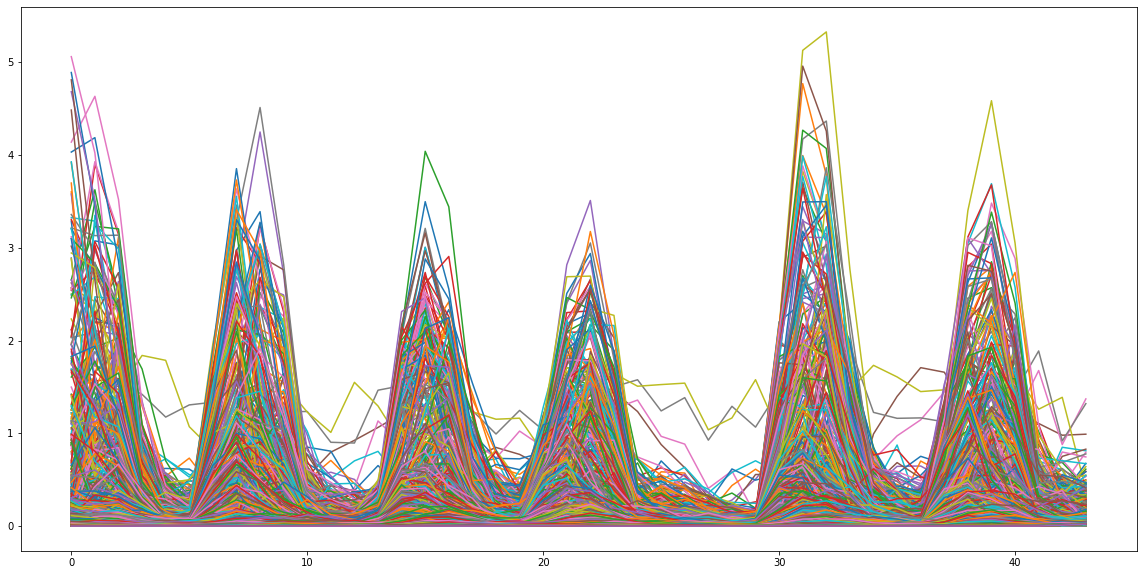

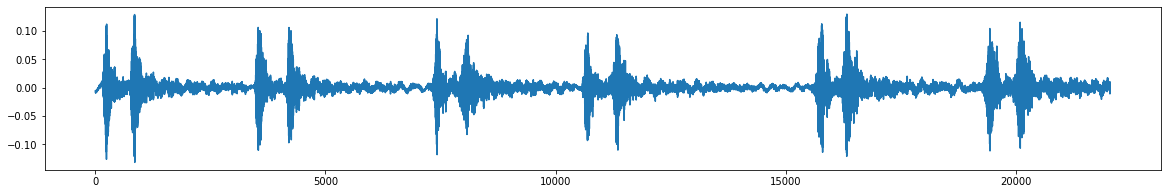

In [30]:
plt.figure(figsize=(20, 10))
for plot in callStft:
    plt.plot(abs(plot))

plt.figure(figsize=(20, 3))
plt.plot(oneSecondCall)

1. Filter the noise by fourier-coefficients
- search and nullify relevant fourier-coefficients

In [32]:
import soundfile as sf

sf.write("../soundFiles/readSoundfiles/filterNoise/filterByFourierCoefficients/oneSecondCall.wav", oneSecondCall, sr)

2. Filter low values
- save as a file

In [40]:
print(len(callStft))

1025


In [56]:
def filterFC(fcArray):
    fcArrayCopy = fcArray.copy()

    for i in range(len(fcArray)):
        subArray = fcArray[i]
        for j in range(len(subArray)):
            if abs(subArray[j]) <= 0.5:
                fcArrayCopy[i][j] = 0+0.j

    return(fcArrayCopy)

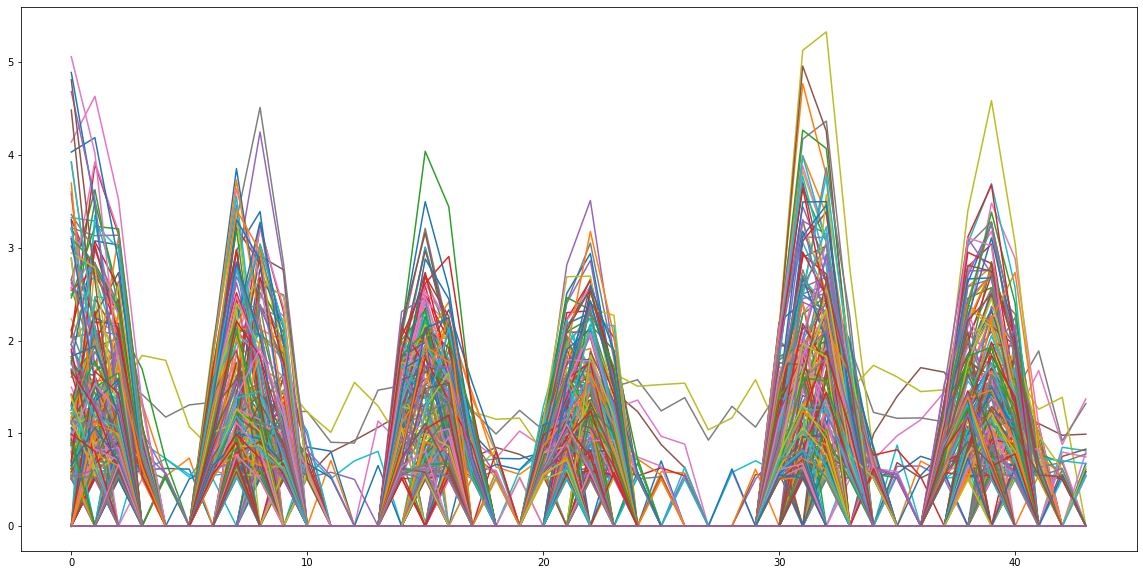

In [57]:
filteredFC = filterFC(callStft)

plt.figure(figsize=(20, 10))
for plot in filteredFC:
    plt.plot(abs(plot))

Get sound from filtered FC

In [58]:
#filteredFCSound = librosa.istft(filteredFC)

#print(filteredFCSound)

#sf.write("../soundFiles/readSoundfiles/filterNoise/filterByFourierCoefficients/oneSecondCallFiltered-0_1.wav", filteredFCSound, sr)